In [1]:
from sklearn import datasets
from sklearn import svm
import numpy as np
import matplotlib.pyplot as plt

In [3]:
wine = datasets.load_wine()

In [4]:
print("description ::",wine['DESCR'])

description :: .. _wine_dataset:

Wine recognition dataset
------------------------

**Data Set Characteristics:**

    :Number of Instances: 178 (50 in each of three classes)
    :Number of Attributes: 13 numeric, predictive attributes and the class
    :Attribute Information:
 		- Alcohol
 		- Malic acid
 		- Ash
		- Alcalinity of ash  
 		- Magnesium
		- Total phenols
 		- Flavanoids
 		- Nonflavanoid phenols
 		- Proanthocyanins
		- Color intensity
 		- Hue
 		- OD280/OD315 of diluted wines
 		- Proline

    - class:
            - class_0
            - class_1
            - class_2
		
    :Summary Statistics:
    
    ============================= ==== ===== ======= =====
                                   Min   Max   Mean     SD
    ============================= ==== ===== ======= =====
    Alcohol:                      11.0  14.8    13.0   0.8
    Malic Acid:                   0.74  5.80    2.34  1.12
    Ash:                          1.36  3.23    2.36  0.27
    Alcalinity of As

In [27]:
def visualize():
    x=wine.data[:,:2]
    y = wine.target
    plt.scatter(x[:,0],x[:,1],c=y,cmap=plt.cm.coolwarm)
    plt.xlabel('alchol')
    plt.ylabel('malic acid')
    plt.title('wine data')
    plt.show()

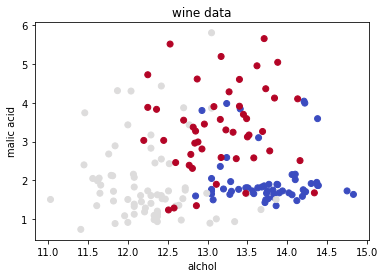

In [28]:
visualize()

In [29]:
x = wine.data[:,:2]
y = wine.target
C = 1.0

In [30]:
svc = svm.SVC(kernel='linear',C=C).fit(x,y)
lin_svc = svm.LinearSVC(C=C).fit(x,y)
rbf_svc = svm.SVC(kernel='rbf',gamma=0.7,C=C).fit(x,y)
poly_svc = svm.SVC(kernel='poly',degree=3,C=C).fit(x,y)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [31]:
svc

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='poly', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [32]:
lin_svc

LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=1000,
          multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
          verbose=0)

In [33]:
rbf_svc

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.7, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [34]:
poly_svc

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='poly', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [35]:
h = .02
x_min,x_max = x[:,0].min() - 1,x[:,0].max() + 1
y_min,y_max = x[:,1].min() - 1,x[:,1].max() + 1
xx,yy = np.meshgrid(np.arange(x_min,x_max,h),np.arange(y_min,y_max))

In [36]:
xx

array([[10.03, 10.05, 10.07, ..., 15.79, 15.81, 15.83],
       [10.03, 10.05, 10.07, ..., 15.79, 15.81, 15.83],
       [10.03, 10.05, 10.07, ..., 15.79, 15.81, 15.83],
       ...,
       [10.03, 10.05, 10.07, ..., 15.79, 15.81, 15.83],
       [10.03, 10.05, 10.07, ..., 15.79, 15.81, 15.83],
       [10.03, 10.05, 10.07, ..., 15.79, 15.81, 15.83]])

In [37]:
yy

array([[-0.26, -0.26, -0.26, ..., -0.26, -0.26, -0.26],
       [ 0.74,  0.74,  0.74, ...,  0.74,  0.74,  0.74],
       [ 1.74,  1.74,  1.74, ...,  1.74,  1.74,  1.74],
       ...,
       [ 4.74,  4.74,  4.74, ...,  4.74,  4.74,  4.74],
       [ 5.74,  5.74,  5.74, ...,  5.74,  5.74,  5.74],
       [ 6.74,  6.74,  6.74, ...,  6.74,  6.74,  6.74]])

In [38]:
titles = ['svc with linear',
         'linearsvc(linear Kernal)',
         'svc with rbf kernel',
         'svc with polynomial (degree 3) kernel']

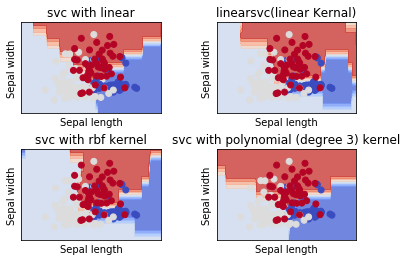

In [39]:
for i,clf in enumerate((svc,rbf_svc,poly_svc,lin_svc)):
    plt.subplot(2,2,i+1)
    plt.subplots_adjust(wspace=0.4,hspace=0.4)
    
    z= clf.predict(np.c_[xx.ravel(),yy.ravel()])
    
    z = z.reshape(xx.shape)
    plt.contourf(xx,yy,z,cmap=plt.cm.coolwarm,alpha=0.8)
    
    plt.scatter(x[:,0],x[:,1],c=y,cmap=plt.cm.coolwarm)
    plt.xlabel('Sepal length')
    plt.ylabel('Sepal width')
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.xticks(())
    plt.yticks(())
    plt.title(titles[i])

In [40]:
plt.show()